In [1]:
from fastai.vision.all import *
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
path = Path("../data/ESD/")

In [4]:
def grandparent_label(path):
    return Path(path).parent.parent.name

def _parent_idxs(files, name):
    return L([i for i, path in enumerate(files) if parent_label(path) == name])

def ParentSplitter(train_name='train', valid_name='valid'):
    def _inner(o):
        return _parent_idxs(o, train_name), _parent_idxs(o, valid_name)
    return _inner

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=grandparent_label,
    item_tfms=[Resize((128, 180), method="squish")]
).dataloaders(path, bs=64)

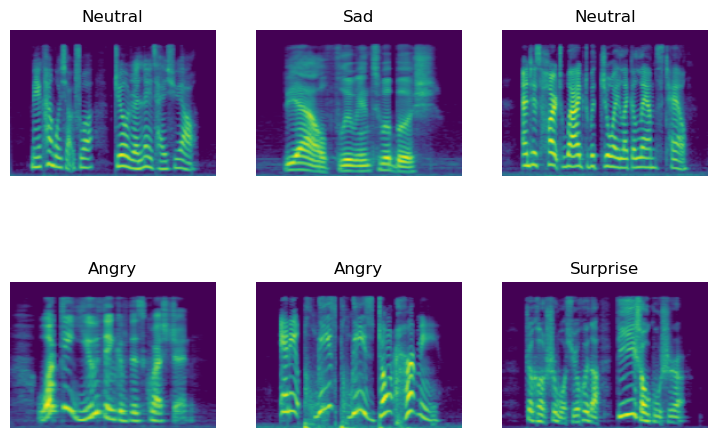

In [6]:
dls.show_batch(max_n=6)

In [7]:
learn = vision_learner(dls, resnet18, metrics=accuracy).to_fp16()

/home/ahad/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ahad/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


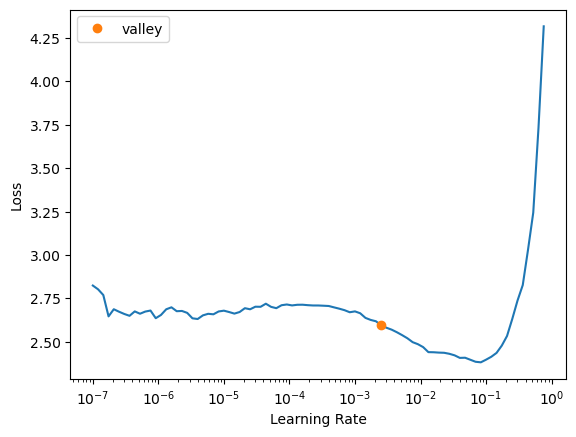

In [8]:
lr = learn.lr_find()

In [9]:
learn.fine_tune(5, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,1.214673,1.021148,0.575429,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.594363,0.505359,0.801286,00:07
1,0.386140,0.399716,0.850143,00:07
2,0.254234,0.363372,0.869000,00:07
3,0.151718,0.314046,0.895143,00:07
4,0.097186,0.336833,0.900429,00:07
5,0.047552,0.383028,0.902571,00:07
6,0.028736,0.324617,0.919286,00:07
7,0.008373,0.301315,0.927429,00:07
8,0.004297,0.297163,0.930714,00:07
9,0.002889,0.298696,0.929286,00:07


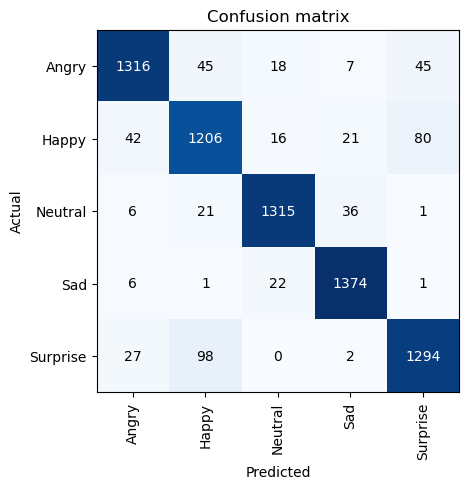

In [10]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

In [23]:
interep.print_classification_report()

              precision    recall  f1-score   support

       Angry       0.94      0.92      0.93      1431
       Happy       0.88      0.88      0.88      1365
     Neutral       0.96      0.95      0.96      1379
         Sad       0.95      0.98      0.97      1404
    Surprise       0.91      0.91      0.91      1421

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000



In [27]:
learn.save("model0")

Path('models/model0.pth')